In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"rawdata\NCBirths2004.csv")

1

In [6]:
weight = data['Weight']

In [9]:
from scipy.stats import bootstrap

In [27]:
boots = bootstrap(data= (weight,), statistic= np.mean, n_resamples= 9999, axis=0, random_state= 2002)

In [32]:
import researchpy as rp
# The bootstrap standard error of a statistic is the standard deviation of the bootstrap distribution of that statistic.
rp.summarize(data= boots.bootstrap_distribution, stats= ["Mean", "Variance", "SD", "CI", 'Min', 'Max', 'Range', "Kurtosis", "Skew"], decimals=2)

,Mean,Variance,SD,95% Conf. Interval,Min,Max,Range,Kurtosis,Skew
0,3448.13,234.51,15.31,"[3447.83, 3448.43]",3393.05,3509.32,116.27,3.03,0.03


<Axes: ylabel='Count'>

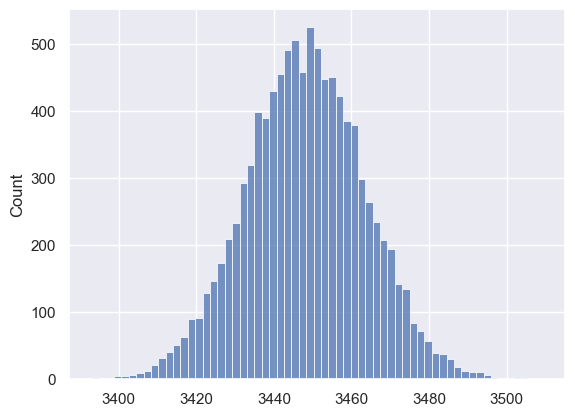

In [28]:
import seaborn as sns
sns.set_theme(style='darkgrid')
sns.histplot(boots.bootstrap_distribution)

the plug-in principle 118